In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


###**Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
x = np.arange(1000, 2000, 2)

###**Data reading**

In [6]:
#reading train data
df_train = pd.DataFrame()

df_train1 = pd.DataFrame()
df_train1 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/train/1.csv")
df_train1 = df_train1.drop(df_train1.columns[0], axis=1)  
df_train1["target"] = np.ones(df_train1.shape[0], dtype="int")
df_train = pd.concat([df_train, df_train1], axis=0)

df_train0 = pd.DataFrame()
df_train0 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/train/0.csv")
df_train0 = df_train0.drop(df_train0.columns[0], axis=1)  
df_train0["target"] = np.zeros(df_train0.shape[0], dtype="int")
df_train = pd.concat([df_train, df_train0], axis=0)


#reading test data
df_test = pd.DataFrame()

df_test1 = pd.DataFrame()
df_test1 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/test/1.csv")
df_test1 = df_test1.drop(df_test1.columns[0], axis=1)  
df_test1["target"] = np.ones(df_test1.shape[0], dtype="int")
df_test = pd.concat([df_test, df_test1], axis=0)

df_test0 = pd.DataFrame()
df_test0 = pd.read_csv("/content/drive/MyDrive/BTP/Data/final/envelopes/2/test/0.csv")
df_test0 = df_test0.drop(df_test0.columns[0], axis=1)  
df_test0["target"] = np.zeros(df_test0.shape[0], dtype="int")
df_test = pd.concat([df_test, df_test0], axis=0)

df_train = df_train.sample(frac=1)
df_test = df_test.sample(frac=1)

###**Train/Test Split**

In [7]:
X_train = df_train.drop("target", axis=1)
Y_train = df_train["target"]

X_train = np.array(X_train)
Y_train = np.array(Y_train, dtype='int')

X_test = df_test.drop("target", axis=1)
Y_test = df_test["target"]

X_test = np.array(X_test)
Y_test = np.array(Y_test, dtype='int')

###**Plots**

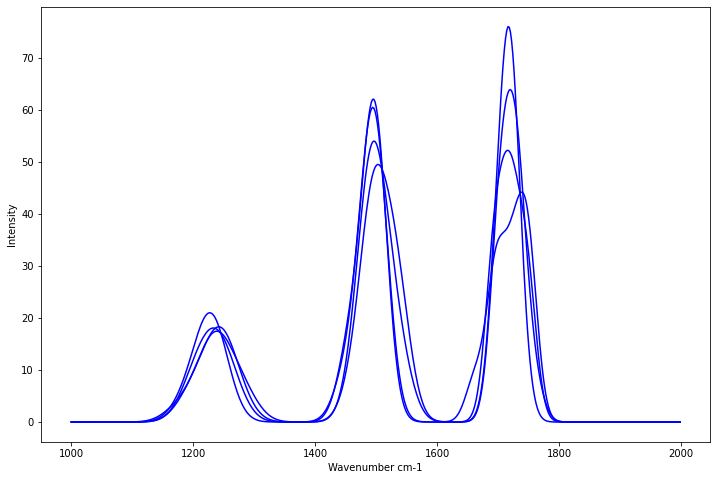

In [9]:
plt.figure(figsize=(12,8))

count = 0 
for i in range(len(X_train)):
  if Y_train[i] == 1:
    if count%500 == 0:
      plt.plot(x, X_train[i], color="blue")
    count += 1

plt.xlabel("Wavenumber cm-1")
plt.ylabel("Intensity")
plt.show()

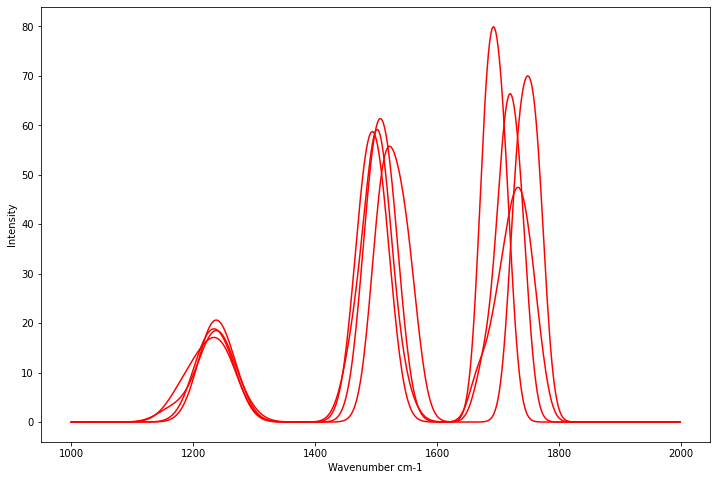

In [10]:
plt.figure(figsize=(12,8))

count = 0 
for i in range(len(X_train)):
  if Y_train[i] == 0:
    if count%500 == 0:
      plt.plot(x, X_train[i], color="red")
    count += 1

plt.xlabel("Wavenumber cm-1")
plt.ylabel("Intensity")
plt.show()

###**Data pre-processing**

In [ ]:
mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

###**Hyperparameters tuning**

In [ ]:
C = [0.001, 0.01, 0.1, 1, 10]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']

model_params = {
    'Support Vector Machine':{
        'model': SVC(),
        'params':{
            'C': C,
            'kernel': kernel
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    best_model = RandomizedSearchCV(estimator=mp['model'], 
                                    param_distributions=mp['params'], 
                                    scoring='f1_micro', 
                                    n_jobs = -1,
                                    n_iter = 25,
                                    cv=10,
                                    verbose=0)
    
    best_model.fit(X_train, Y_train)
    scores.append({
        'model':model_name,
        'Best Score':best_model.best_score_,
        'Best Parameter':best_model.best_params_
    })

best_params = pd.DataFrame(scores)
best_params.head()

,model,Best Score,Best Parameter
0,Support Vector Machine,0.6025,"{'kernel': 'poly', 'C': 1}"


###**Final model training**

In [ ]:
svm = SVC(kernel='poly', C=1)
svm.fit(X_train, Y_train)

SVC(C=1, kernel='poly')

###**Evaluation of model**

In [ ]:
Y_pred_train = svm.predict(X_train)
Y_pred_test = svm.predict(X_test)

print("Classification Report(Train)\n")
print(classification_report(Y_train, Y_pred_train))

print('\n')

print("Classification Report(Test)\n")
print(classification_report(Y_test, Y_pred_test))

Classification Report(Train)

              precision    recall  f1-score   support

           0       0.70      0.46      0.55      2000
           1       0.60      0.80      0.68      2000

    accuracy                           0.63      4000
   macro avg       0.65      0.63      0.62      4000
weighted avg       0.65      0.63      0.62      4000



Classification Report(Test)

              precision    recall  f1-score   support

           0       0.60      0.52      0.55       499
           1       0.58      0.66      0.61       500

    accuracy                           0.59       999
   macro avg       0.59      0.59      0.58       999
weighted avg       0.59      0.59      0.58       999



Train CM


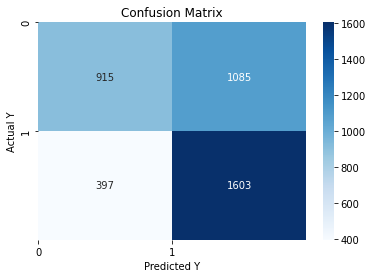





Test CM


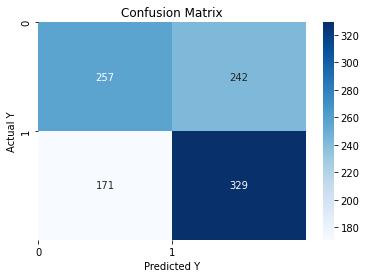

In [ ]:
print('Train CM')
cm = confusion_matrix(Y_train, Y_pred_train)

sns.heatmap(cm, annot=True, fmt='.4g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(2));
plt.yticks(np.arange(2));
plt.show()

print('\n')
print('\n')

print('Test CM')
cm = confusion_matrix(Y_test, Y_pred_test)

sns.heatmap(cm, annot=True, fmt='.3g', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Y')
plt.ylabel('Actual Y')

plt.xticks(np.arange(2));
plt.yticks(np.arange(2));

plt.show()